In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import pickle

In [2]:
data = pd.read_csv("Churn_Modelling.csv")

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [5]:
data = data.drop(columns = ['RowNumber', 'CustomerId', 'Surname'])

In [6]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### SOME PLOTTING I WANT TO DO

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
data.shape

(10000, 11)

In [9]:
data["Gender"].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

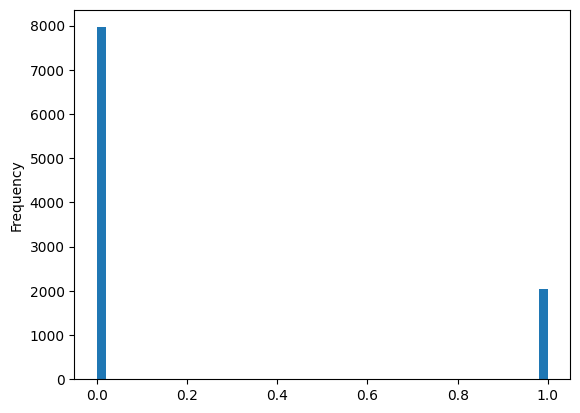

In [10]:
data["Exited"].plot.hist(bins=50)

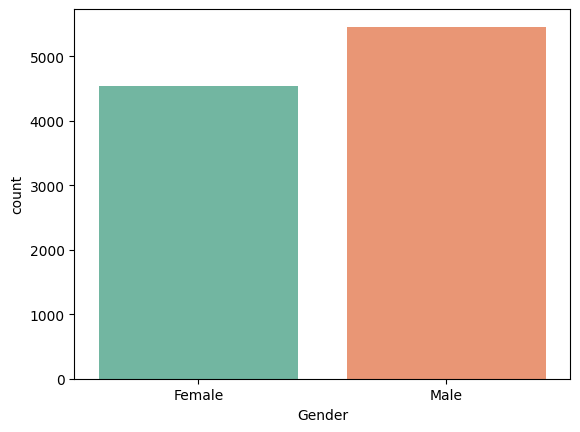

In [11]:
sns.countplot(data = data, x = "Gender", hue = "Gender", palette = "Set2")
plt.show()

In [12]:
data.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

<Axes: xlabel='Age', ylabel='Density'>

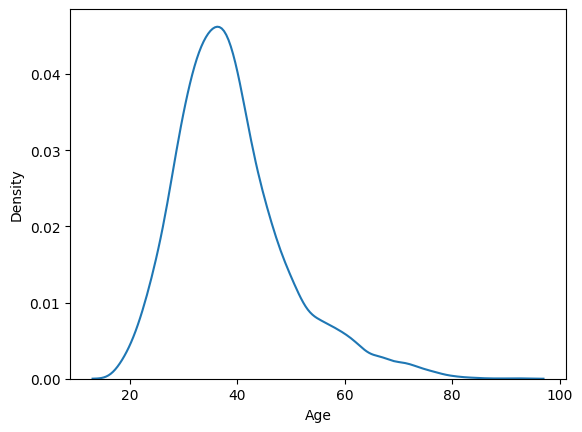

In [13]:
sns.kdeplot(x = data["Age"])

In [14]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [15]:
data["Tenure"].value_counts()

Tenure
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: count, dtype: int64

In [16]:
data["NumOfProducts"].unique()

array([1, 3, 2, 4], dtype=int64)

In [17]:
data.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

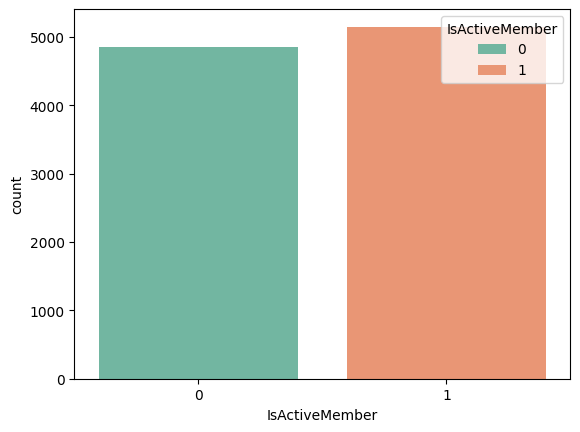

In [18]:
sns.countplot(data = data, x = 'IsActiveMember', hue = 'IsActiveMember', palette = "Set2")
plt.show()

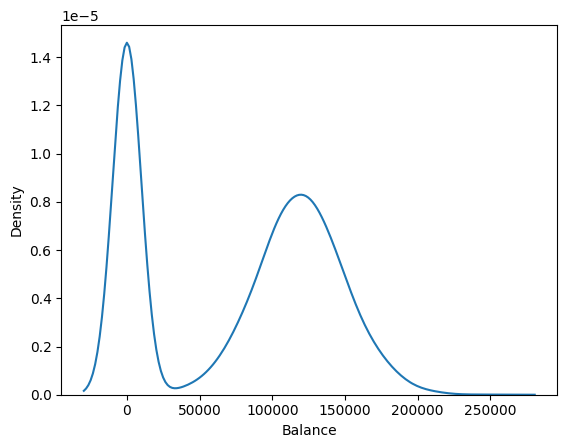

In [19]:
sns.kdeplot(x = data['Balance'])
plt.show()

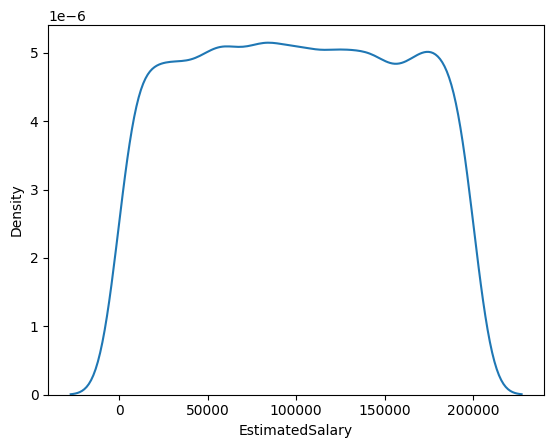

In [20]:
sns.kdeplot(x = data['EstimatedSalary'])
plt.show()

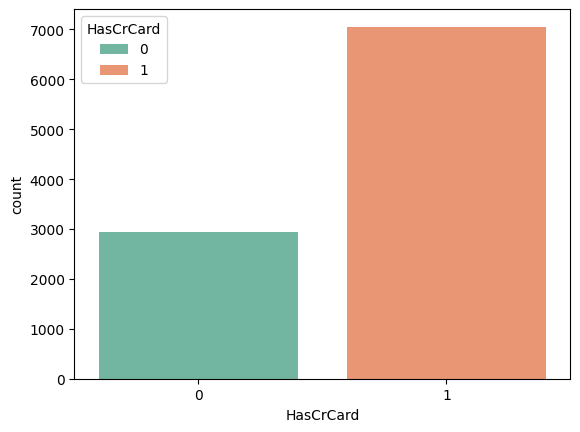

In [21]:
sns.countplot(data = data, x = 'HasCrCard', hue = 'HasCrCard', palette = "Set2")
plt.show()

In [22]:
data["Geography"].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [23]:
##preprocess the data
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [24]:
##encode one categorical variable Gender

label_encoder_gender = LabelEncoder()
data["Gender"] = label_encoder_gender.fit_transform(data["Gender"])
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,1,39,5,0.00,2,1,0,96270.64,0
9996,516,France,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,0,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,1,42,3,75075.31,2,1,0,92888.52,1


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  int32  
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int32(1), int64(7), object(1)
memory usage: 820.4+ KB


In [26]:
##one hot encode geography

from sklearn.preprocessing import OneHotEncoder
onehot_geo = OneHotEncoder()
geo_encoder = onehot_geo.fit_transform(data[["Geography"]])
geo_encoder

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 10000 stored elements and shape (10000, 3)>

In [27]:
onehot_geo.get_feature_names_out(["Geography"])

array(['Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype=object)

In [28]:
encoded_data_geo = pd.DataFrame(geo_encoder.toarray(), columns = ['Geography_France', 'Geography_Germany', 'Geography_Spain'])

In [29]:
encoded_data_geo

,Geography_France,Geography_Germany,Geography_Spain
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0
...,...,...,...
9995,1.0,0.0,0.0
9996,1.0,0.0,0.0
9997,1.0,0.0,0.0
9998,0.0,1.0,0.0


In [30]:
## combine all the columns

data_new = pd.concat([encoded_data_geo, data], axis = 1)

In [31]:
data_new = data_new.drop(columns = ["Geography"])

In [32]:
data_new.head()

,Geography_France,Geography_Germany,Geography_Spain,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1.0,0.0,0.0,619,0,42,2,0.00,1,1,1,101348.88,1
1,0.0,0.0,1.0,608,0,41,1,83807.86,1,0,1,112542.58,0
2,1.0,0.0,0.0,502,0,42,8,159660.80,3,1,0,113931.57,1
3,1.0,0.0,0.0,699,0,39,1,0.00,2,0,0,93826.63,0
4,0.0,0.0,1.0,850,0,43,2,125510.82,1,1,1,79084.10,0


In [33]:
#saving files in pickel format of label encoder and OHE.

with open('label_encoder_gender.pkl', 'wb') as file:
    pickle.dump(label_encoder_gender, file)

with open('onehot_geo.pkl', 'wb') as file:
    pickle.dump(onehot_geo, file)

In [34]:
## independent and dependent features

data_new.head()

,Geography_France,Geography_Germany,Geography_Spain,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1.0,0.0,0.0,619,0,42,2,0.00,1,1,1,101348.88,1
1,0.0,0.0,1.0,608,0,41,1,83807.86,1,0,1,112542.58,0
2,1.0,0.0,0.0,502,0,42,8,159660.80,3,1,0,113931.57,1
3,1.0,0.0,0.0,699,0,39,1,0.00,2,0,0,93826.63,0
4,0.0,0.0,1.0,850,0,43,2,125510.82,1,1,1,79084.10,0


In [35]:
X = data_new.drop("Exited", axis = 1)
y = data_new["Exited"]

,Geography_France,Geography_Germany,Geography_Spain,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1.0,0.0,0.0,619,0,42,2,0.00,1,1,1,101348.88
1,0.0,0.0,1.0,608,0,41,1,83807.86,1,0,1,112542.58
2,1.0,0.0,0.0,502,0,42,8,159660.80,3,1,0,113931.57
3,1.0,0.0,0.0,699,0,39,1,0.00,2,0,0,93826.63
4,0.0,0.0,1.0,850,0,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.0,0.0,0.0,771,1,39,5,0.00,2,1,0,96270.64
9996,1.0,0.0,0.0,516,1,35,10,57369.61,1,1,1,101699.77
9997,1.0,0.0,0.0,709,0,36,7,0.00,1,0,1,42085.58
9998,0.0,1.0,0.0,772,1,42,3,75075.31,2,1,0,92888.52


In [38]:
# train test split

from sklearn.model_selection import train_test_split

In [39]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size= 0.2, random_state=16)

In [44]:
Xtrain

,Geography_France,Geography_Germany,Geography_Spain,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
4930,0.0,1.0,0.0,627,1,30,6,112372.96,1,1,1,118029.09
687,0.0,1.0,0.0,769,0,45,5,126674.81,1,1,0,124118.71
6141,1.0,0.0,0.0,572,1,24,1,0.00,2,1,1,151460.84
204,0.0,0.0,1.0,512,1,33,3,176666.62,1,1,0,94670.77
624,0.0,0.0,1.0,477,0,48,2,129120.64,1,0,1,26475.79
...,...,...,...,...,...,...,...,...,...,...,...,...
635,0.0,0.0,1.0,696,0,51,5,0.00,2,1,0,55022.43
1345,0.0,0.0,1.0,568,0,26,6,0.00,2,0,0,166495.20
581,0.0,0.0,1.0,607,0,33,2,108431.87,2,0,1,109291.39
2169,0.0,1.0,0.0,773,1,43,8,81844.91,2,1,1,35908.46


In [45]:
#standard_scalar

from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

In [46]:
Xtrain = scalar.fit_transform(Xtrain)
Xtest = scalar.transform(Xtest)

In [50]:
#saving the pickle file
with open('scalar.pkl', 'wb') as file:
    pickle.dump(scalar, file)

In [51]:
## training ann
import tensorflow as tf

In [52]:
# Sequential Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
import datetime


In [54]:
## ANN Model
model = Sequential([
    Dense(64,activation='relu',input_shape = (Xtrain.shape[1],)), ##1st hidden layer connected with inout layer
    Dense(32, activation="relu"),  #2nd layer
    Dense(1,activation = "sigmoid") #output layer
])

c:\Users\amanm\Desktop\DIAT\Data Science\ANN_Streamlit\ann_streamlit\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [55]:
model.summary() #total paramenters 2945

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,945 (11.50 KB)

 Trainable params: 2,945 (11.50 KB)

 Non-trainable params: 0 (0.00 B)

In [56]:
#variable learning rate
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
loss = tf.keras.losses.binary_crossentropy

In [57]:
## compile model (forward and backward propagation)

model.compile(optimizer=opt, loss = loss, metrics = ["accuracy"])

In [58]:
## setup the Tensorboard for visualizing purpose, when we train our model it will store all the logs over here
log_directory = "logs/fit" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

In [59]:
#callback

tensorflow_callback = TensorBoard(log_dir = log_directory, histogram_freq= 1)

In [62]:
##setup early stopping ---> when we are training a neural network, we can train it for any number of epochs, but if we see that in 20 epochs it has reached some level, then there is no point of training it continuosly, we have track the loss value, check the loss value and apply early stopping.
early_stopping_callback = EarlyStopping(monitor= "val_loss", patience=10, restore_best_weights=True)



In [63]:
## stage of training the model

history = model.fit(
    Xtrain,ytrain, validation_data = (Xtest, ytest), epochs = 100,
    callbacks= [tensorflow_callback, early_stopping_callback]
)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8728 - loss: 0.3148 - val_accuracy: 0.8565 - val_loss: 0.3439
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8714 - loss: 0.3158 - val_accuracy: 0.8540 - val_loss: 0.3528
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8651 - loss: 0.3223 - val_accuracy: 0.8555 - val_loss: 0.3441
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8745 - loss: 0.3073 - val_accuracy: 0.8595 - val_loss: 0.3446
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8741 - loss: 0.3028 - val_accuracy: 0.8575 - val_loss: 0.3601
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8810 - loss: 0.2942 - val_accuracy: 0.8555 - val_loss: 0.3462
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8759 - loss: 0.3039 - val_accuracy: 0.8610 - val_loss: 0.3550
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8692 - loss: 0.3120 - val_accu

In [64]:
# save the model
model.save("model.h5")

In [71]:
##load tensorborad extension

%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [77]:
%tensorboard --logdir logs/fit20240920-185741

Reusing TensorBoard on port 6010 (pid 17124), started 0:00:31 ago. (Use '!kill 17124' to kill it.)

In [ ]:
##load the pickle file

